In [41]:
from ACLScheduleTest.Simulate import Simulator

In [57]:
Print_limit = 10
Epoch  = 0
def schedule_in_func(workers, cache, av_mem, factor_node_dict, calculated_node_dict, dsk, global_dict):
    global  Print_limit, Epoch
    Epoch += 1
    if Print_limit >= Epoch:
        print(f'Epoch {Epoch}')
        print('#'*60,'\n')

        print(f'workers:\n {workers}')
        print('#'*60,'\n')

        print(f'cache:\n{cache}')
        print('#'*60,'\n')

        print(f'av_mem:\n{av_mem}')
        print('#'*60,'\n')

        print(f'factor_node_dict:\n{factor_node_dict}')
        print('#'*60,'\n')

        print(f'calculated_node_dict:\n{calculated_node_dict}')
        print('#'*60,'\n')
        print(f'dsk:\n{dsk}')

        print('#'*60,'\n')
        print(f'global_dict:\n{global_dict}')

        print('-'*60, '\n'*5)
    factor_node = set([k for k in factor_node_dict if factor_node_dict[k] is None])

    if len(factor_node) == 0:
        return None

    workers_nodes = set([workers[k][0] for k in workers if workers[k] is not None])

    def topoOrder():
        topoQueue = []
        q = list(factor_node - set(cache.keys()) - workers_nodes)

        nodeList = set(dsk.keys()) - set(factor_node)
        while len(q):
            node, q = q[0], q[1:]

            topoQueue.append(node)

            append_nodes = [arg for arg in dsk[node][1:] if
                            (arg in nodeList) and (arg not in cache.keys()) and (arg not in workers_nodes)]
            nodeList = nodeList - set(append_nodes)
            q = q + append_nodes
        return topoQueue

    topo_node = topoOrder()

    nodeList = dsk.keys()

    def available_node():
        for node in topo_node:
            if dsk[node][0].mem > av_mem:
                continue
            args = dsk[node][1:]
            isAvailable = True
            for arg in args:
                if (arg in nodeList) and (arg not in cache):
                    isAvailable = False
                    break
            if isAvailable:
                return node
        return None
    print(f'%' * 60,'\n')

    print(f'return:{available_node()}')
    return available_node()



In [58]:
def schedule_out_func(workers, cache, av_mem, factor_node_dict, calculated_node_dict, dsk, global_dict):
    # need to calculater
    factor_node = set([k for k in factor_node_dict if factor_node_dict[k] is None])

    if len(factor_node) == 0:
        return []

    workers_nodes = set([workers[k][0] for k in workers if workers[k] is not None])

    def topoOrder():
        topoQueue = []
        q = list(factor_node - set(cache.keys()) - workers_nodes)

        nodeList = set(dsk.keys()) - set(factor_node)
        while len(q):
            node, q = q[0], q[1:]

            topoQueue.append(node)

            append_nodes = [arg for arg in dsk[node][1:] if
                            (arg in nodeList) and (arg not in cache.keys()) and (arg not in workers_nodes)]
            nodeList = nodeList - set(append_nodes)
            q = q + append_nodes
        return topoQueue

    topo_node = topoOrder()

    def trash_cache():
        trash_node = []

        for node in cache:
            isTrash = True
            for tp_node in topo_node + list(workers_nodes):
                if node in dsk[tp_node][1:]:
                    isTrash = False
                    break
            if isTrash:
                trash_node.append(node)
        return trash_node

    return trash_cache()

Epoch 1
############################################################ 

workers:
 {'worker_0': None, 'worker_1': None, 'worker_2': None, 'worker_3': None, 'worker_4': None, 'worker_5': None, 'worker_6': None, 'worker_7': None, 'worker_8': None, 'worker_9': None}
############################################################ 

cache:
{}
############################################################ 

av_mem:
35
############################################################ 

factor_node_dict:
{'node93': None, 'node55': None, 'node92': None, 'node69': None, 'node64': None, 'node76': None, 'node72': None, 'node89': None, 'node95': None, 'node96': None, 'node98': None, 'node47': None, 'node86': None, 'node73': None, 'node91': None, 'node67': None, 'node99': None, 'node82': None, 'node94': None, 'node60': None, 'node25': None, 'node97': None, 'node74': None, 'node85': None, 'node59': None, 'node80': None, 'node71': None, 'node87': None, 'node79': None, 'node49': None, 'node83': None, 'node42': Non

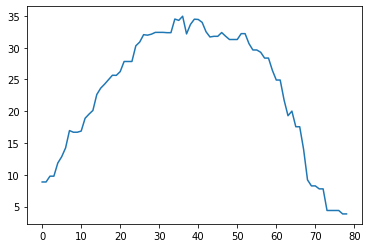

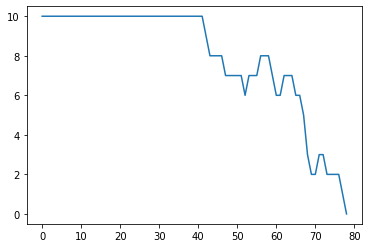

In [59]:
sim = Simulator()
sim.simulate(schedule_in_func, schedule_out_func, mem_bound=35)